## Modelo Autorregressivo de Médias Móveis - ARMA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clima_india.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

<AxesSubplot:xlabel='date'>

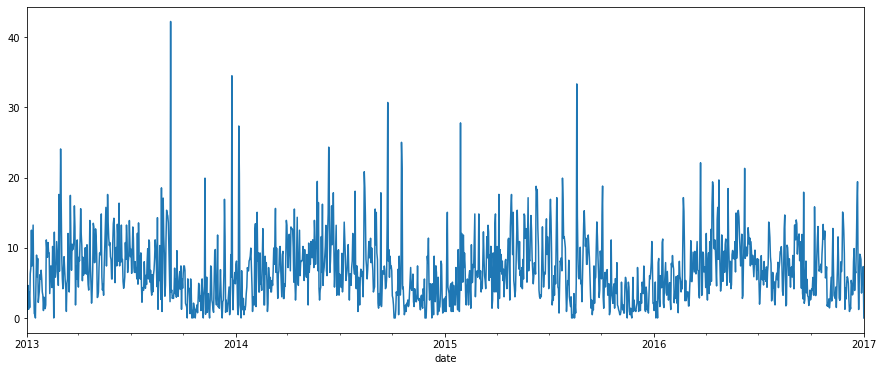

In [6]:
df.wind_speed.plot(figsize=(15,6))

In [11]:
from statsmodels.tsa.arima_model import ARMA

arma = ARMA(df.wind_speed, freq='D', order=(2,2)).fit()

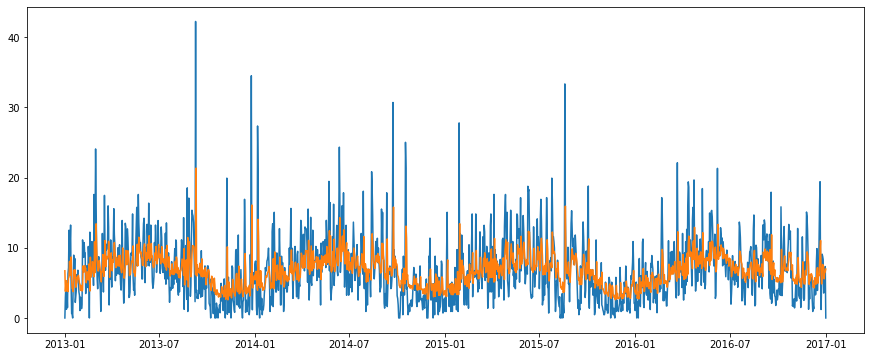

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df.wind_speed)
plt.plot(arma.predict())

In [19]:
n = len(df.wind_speed)
train_size = int(n * 2/3)
train_set = df.wind_speed[:train_size]
test_set = df.wind_speed[train_size:]

date
2015-09-02    12.737500
2015-09-03    10.187500
2015-09-04    11.350000
2015-09-05     7.637500
2015-09-06     7.637500
                ...    
2016-12-28     3.547826
2016-12-29     6.000000
2016-12-30     6.266667
2016-12-31     7.325000
2017-01-01     0.000000
Name: wind_speed, Length: 488, dtype: float64

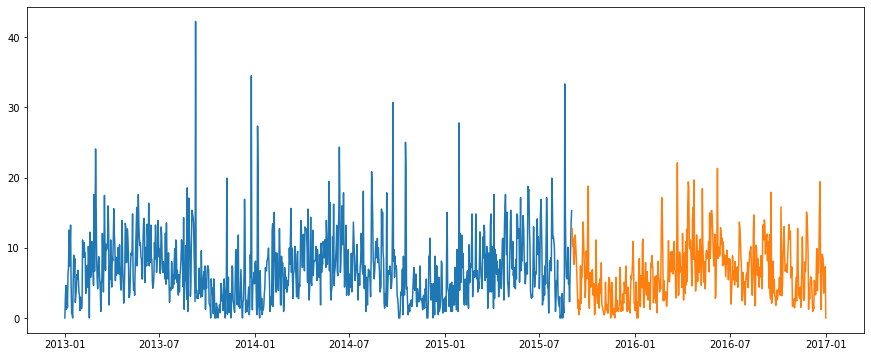

In [21]:
plt.figure(figsize=(15,6))
plt.plot(train_set)
plt.plot(test_set)

In [22]:
from statsmodels.tsa.arima_model import ARMA

arma22_train = ARMA(train_set, freq='D', order=(2,2)).fit()
arma22_train.params

const               6.912795
ar.L1.wind_speed    1.212281
ar.L2.wind_speed   -0.223550
ma.L1.wind_speed   -0.874822
ma.L2.wind_speed   -0.069500
dtype: float64

In [26]:
arma22_test = ARMA(test_set, freq='D', order=(2,2)).fit(arma22_train.params)
(arma22_test.resid ** 2).mean()

10.88465453088404

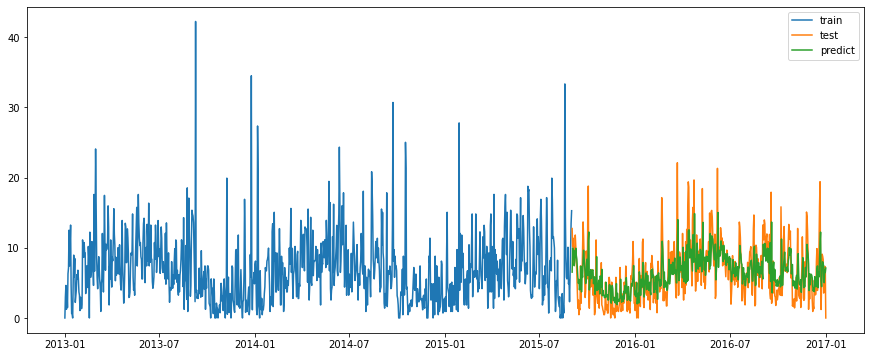

In [30]:
plt.figure(figsize=(15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(arma22_test.predict())
plt.legend(['train', 'test', 'predict'])

In [35]:
arma11_train = ARMA(train_set, freq='D', order=(1,1)).fit()
arma22_train = ARMA(train_set, freq='D', order=(2,2)).fit()
arma33_train = ARMA(train_set, freq='D', order=(3,3)).fit()

In [36]:
arma11_test = ARMA(test_set, freq='D', order=(1,1)).fit(arma11_train.params)
arma22_test = ARMA(test_set, freq='D', order=(2,2)).fit(arma22_train.params)
arma33_test = ARMA(test_set, freq='D', order=(3,3)).fit(arma33_train.params)

In [37]:
print((arma11_test.resid ** 2).mean())
print((arma22_test.resid ** 2).mean())
print((arma33_test.resid ** 2).mean())

11.453649282564536
10.88465453088404
10.825277733971937


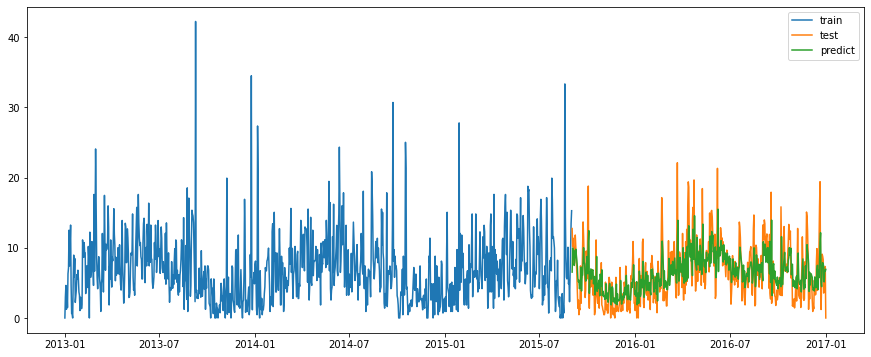

In [38]:
plt.figure(figsize=(15,6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(arma33_test.predict())
plt.legend(['train', 'test', 'predict'])

In [43]:
configs = [(2,0), (3,0), (4,0), (2,1), (2,2), (3,1), (3,2), (3,3)]
best = 100000
for config in configs:
    arma = ARMA(train_set, freq='D', order=config).fit()
    arma_test = ARMA(test_set, freq='D', order=config).fit(arma.params)
    erro = (arma_test.resid ** 2).mean()
    if erro < best:
        best = erro
        print(config, erro)

(2, 0) 11.456824777795426
(3, 0) 11.247260540378148
(4, 0) 11.15878728216156
(2, 1) 11.023013290980304
(2, 2) 10.88465453088404
(3, 3) 10.825277733971937
